In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
import numpy as np
blob_centers=np.array([
    [0.2,2.3],
    [-1.5,2.3],
    [-2.8,1.8],
    [-2.8,2.8],
    [-2.8,1.3]
])
blob_std=np.array([0.4,0.3,0.1,0.1,0.1])
X,y=make_blobs(n_samples=2000,centers=blob_centers,cluster_std=blob_std,random_state=7)

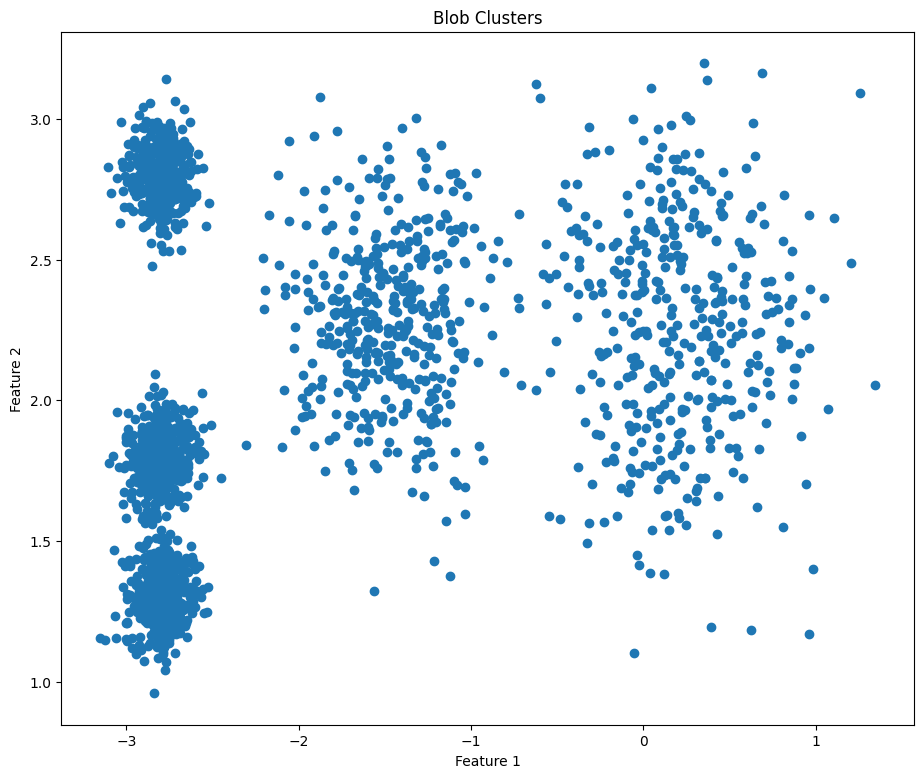

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])
plt.title("Blob Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

5 clusters


Cluster centers determined by K-Means:
[[-1.46871743  2.2864424 ]
 [-2.80214068  1.55162671]
 [ 0.3996969   2.50602047]
 [-2.79290307  2.79641063]
 [ 0.01896307  2.01144566]]


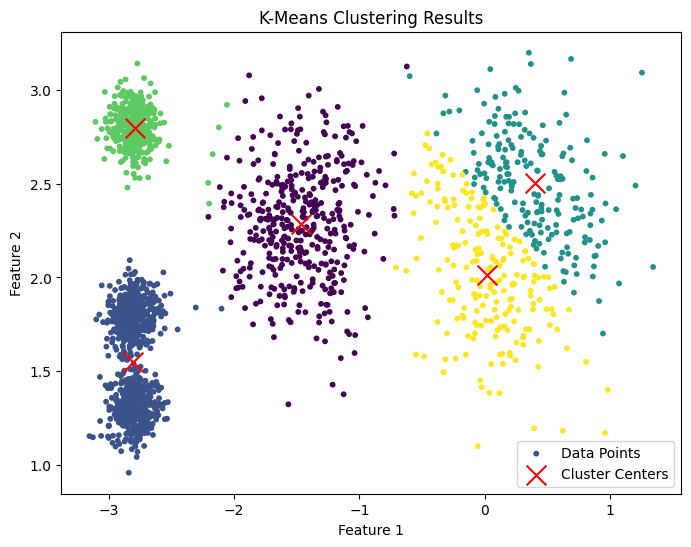

In [ ]:
from sklearn.cluster import KMeans

# Number of clusters (based on the number of blob centers)
n_clusters = len(blob_centers)

# Train the K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=7)
kmeans.fit(X)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Display the cluster centers
print("Cluster centers determined by K-Means:")
print(cluster_centers)

# Plot the clusters with K-Means centers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=10, label='Data Points')
plt.scatter(
    cluster_centers[:, 0],
    cluster_centers[:, 1],
    c='red',
    marker='x',
    s=200,
    label='Cluster Centers'
)
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [ ]:
kmeans.cluster_centers_

array([[-1.46871743,  2.2864424 ],
       [-2.80214068,  1.55162671],
       [ 0.3996969 ,  2.50602047],
       [-2.79290307,  2.79641063],
       [ 0.01896307,  2.01144566]])

In [ ]:
from sklearn.metrics import silhouette_score
score =silhouette_score(X,kmeans.labels_, metric='euclidean')
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.63


Predicted labels for new instances:
Point 1 ([0. 2.]): Cluster 4
Point 2 ([3. 2.]): Cluster 2
Point 3 ([-3.  3.]): Cluster 3
Point 4 ([-3.   2.5]): Cluster 3


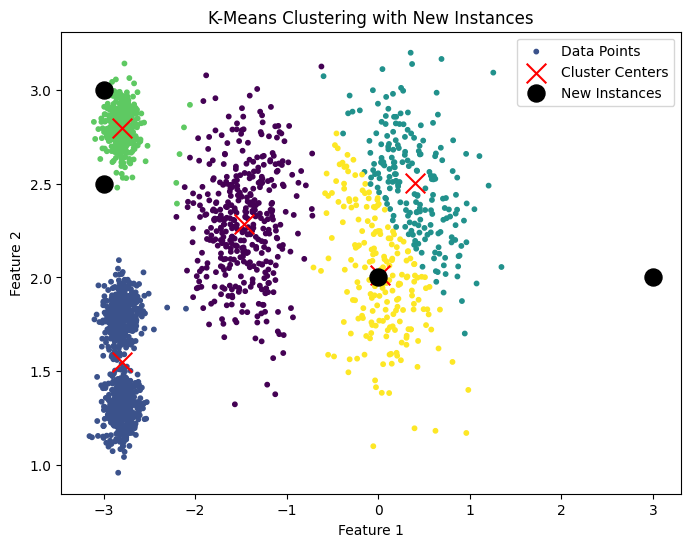

In [ ]:
# New instances
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

# Predict the labels for the new instances
predicted_labels = kmeans.predict(X_new)

# Display the predictions
print("Predicted labels for new instances:")
for i, (point, label) in enumerate(zip(X_new, predicted_labels)):
    print(f"Point {i + 1} ({point}): Cluster {label}")

# Visualize the new points with the clustering
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=10, label='Data Points')
plt.scatter(
    cluster_centers[:, 0],
    cluster_centers[:, 1],
    c='red',
    marker='x',
    s=200,
    label='Cluster Centers'
)
plt.scatter(
    X_new[:, 0],
    X_new[:, 1],
    c='black',
    marker='o',
    s=150,
    label='New Instances'
)
plt.title("K-Means Clustering with New Instances")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
